In [1]:
# import library necessary

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
import nltk

# Zad. 
Wczytaj dane zawierające informacje o piosenkach.

Dane trzeba rozpakować.

https://www.kaggle.com/laowingkin/song-text-mining-and-clustering/data

In [2]:
df = pd.read_csv('songdata.csv')
df['text'] = df['text'].str.replace('\n', '')
df.head(10)

,artist,song,link,text
0,ABBA,Ahe's My Kind Of Girl,/a/abba/ahes+my+kind+of+girl_20598417.html,"Look at her face, it's a wonderful face And i..."
1,ABBA,"Andante, Andante",/a/abba/andante+andante_20002708.html,"Take it easy with me, please Touch me gently ..."
2,ABBA,As Good As New,/a/abba/as+good+as+new_20003033.html,I'll never know why I had to go Why I had to ...
3,ABBA,Bang,/a/abba/bang_20598415.html,Making somebody happy is a question of give an...
4,ABBA,Bang-A-Boomerang,/a/abba/bang+a+boomerang_20002668.html,Making somebody happy is a question of give an...
5,ABBA,Burning My Bridges,/a/abba/burning+my+bridges_20003011.html,"Well, you hoot and you holler and you make me ..."
6,ABBA,Cassandra,/a/abba/cassandra_20002811.html,Down in the street they're all singing and sho...
7,ABBA,Chiquitita,/a/abba/chiquitita_20002978.html,"Chiquitita, tell me what's wrong You're encha..."
8,ABBA,Crazy World,/a/abba/crazy+world_20003013.html,I was out with the morning sun Couldn't sleep...
9,ABBA,Crying Over You,/a/abba/crying+over+you_20177611.html,I'm waitin' for you baby I'm sitting all alon...


# Zmniejszmy troszkę zbiór danych
     

In [3]:
df = df[:1000] 

df.isnull().sum()

artist    0
song      0
link      0
text      0
dtype: int64

In [4]:
# y = df["artist"].values[:1000]
# X = df["text"].values[:1000]

X = df.drop(['artist'], axis=1)
y = df['artist'].values
print(X.shape)
print(y.shape)


(1000, 3)
(1000,)


In [8]:
# np.unique(y)

In [7]:
# print(y)

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# print("X.shape: {} y.shape: {}".format(X.shape, y.shape))

print(y)

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  1  1  1  1  1  1
  1  1  1  1  1  2  2  2  2  2  2  2  2  3  3  3  3  3  3  3  3  3  3  3
  3  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4
  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4
  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4
  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  5  5  5  5  5
  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5
  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5
  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5
  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

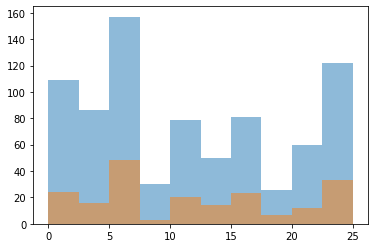

In [30]:
plt.hist(y_train, alpha=0.5)
plt.hist(y_test, alpha=0.5)
plt.show()

In [31]:
print(X_train.shape)
print(y_train.shape)

(800, 3)
(800,)


In [32]:
from sklearn.base import BaseEstimator, TransformerMixin

# A class to select numerical or categorical columns 
# since Scikit-Learn doesn't handle DataFrames yet
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        return X[self.attribute_names]

In [33]:
# import library necessary

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
# import nltk

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string 

def sen2token(sentence):
    return word_tokenize(sentence)

def remove_punctuation(words):
    remove_list =  stopwords.words('english') + list(string.punctuation) + ['--', '."', '!"', '?"', ',"', '``', "''"]
    return [w for w in words if not w in set(remove_list)]

def remove_nummbers(words):
    return [w for w in words if not w.isdigit()]

def to_lower(words):
    return [w.lower() for w in words]

def stemming_tokenizer(words):
    words = sen2token(words)
    words = to_lower(words)    
    words = remove_punctuation(words)
    words = remove_nummbers(words)

    
    stemmer = PorterStemmer()
    return [stemmer.stem(w) for w in words]

#preprocessor działa na całym dokumencie
def my_preprocessing(word):
    return word

tfidf_vectorizer = TfidfVectorizer(preprocessor = my_preprocessing, 
                tokenizer=stemming_tokenizer, 
                stop_words=stopwords.words('english') + list(string.punctuation))

# tfidf_vectorizer.fit(X)
# # print( tfidf_vectorizer.vocabulary_ )
# tfidf_matrix = tfidf_vectorizer.transform(X)
# # print(tfidf_matrix.todense())

In [38]:
from sklearn.pipeline import Pipeline

class ToListEncoder(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        return X.values.T.tolist()[0]


preprocess_pipeline = Pipeline([
        ("select_cat", DataFrameSelector(['song','text'])),
        ("to_numpy", ToListEncoder()),
        ("dictionary_encoder", tfidf_vectorizer),
    ])

X_tr = preprocess_pipeline.fit_transform(X_train)
X_tr
X_tr.todense().shape

(800, 865)

# Zad

Robimy StratifiedKFold i znajdujemy optymalne parametry dla


* MultinomialNB (bez redukcji wymiarowości)
* LogisticRegression
* LinearSVC
* SVC
* KNeighborsClassifier
* DecisionTreeClassifier
* RandomForestClassifier
* BaggingClassifier
* ExtraTreesClassifier
* AdaBoostClassifier
* GradientBoostingClassifier
* VotingClassifier
* xgboost.XGBClassifier

In [39]:
from sklearn.model_selection import StratifiedKFold

seed=123
kfold = StratifiedKFold(n_splits=5, random_state=seed)

In [40]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
pipe = Pipeline([
    ('preprocessing', preprocess_pipeline), 
    ('classifier', SVC(kernel='linear'))])


param_grid = {
            'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100]
}

grid_1 = GridSearchCV(pipe, param_grid, cv=kfold)

grid_1.fit(X_train, y_train)
grid_1.best_params_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'ll", "'re", "'s", "'ve", 'could', 'might', 'must', "n't", 'need', 'sha', 'wo', 'would'] not in stop_words.
  'stop_words.' % sorted(inconsistent))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'classifier__C': 1}

In [43]:
from sklearn import  metrics


models = []
models.append(('SVM linear', grid_1.best_estimator_))



precision_score = []
recall_score = []
f1_score = []
accuracy_score = []
for name, model in models:
    print(name)
    print("precision_score: {}".format(metrics.precision_score(y_test, model.predict(X_test), average='weighted') ))
    print("recall_score: {}".format( metrics.recall_score(y_test, model.predict(X_test), average='weighted') ))
    print("f1_score: {}".format( metrics.f1_score(y_test, model.predict(X_test), average='weighted') ))
    print("accuracy_score: {}".format( metrics.accuracy_score(y_test, model.predict(X_test)) ))
    precision_score.append(metrics.precision_score(y_test, model.predict(X_test), average='weighted'))
    recall_score.append(metrics.recall_score(y_test, model.predict(X_test), average='weighted'))
    f1_score.append( metrics.f1_score(y_test, model.predict(X_test), average='weighted'))
    accuracy_score.append(metrics.accuracy_score(y_test, model.predict(X_test)))

SVM linear
precision_score: 0.1358245526995527


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


recall_score: 0.185
f1_score: 0.1434947542628686


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


accuracy_score: 0.185


In [44]:
import pandas as pd
d = {'precision_score': precision_score, 
     'recall_score': recall_score, 
     'f1_score': f1_score,
     'accuracy_score' : accuracy_score
    }
df = pd.DataFrame(data=d)
df.insert(loc=0, column='Method', value=['SVM linear'])
df

,Method,precision_score,recall_score,f1_score,accuracy_score
0,SVM linear,0.135825,0.185,0.143495,0.185
